In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('house.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [4]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [9]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'number of houses')

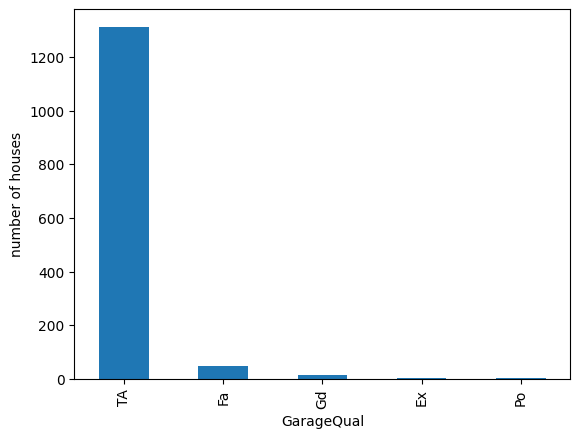

In [7]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('number of houses')

In [10]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

👇 here we are ploting a KDE(Kernel Density Estimate) plot to compare the distribution of SalePrice based on the GarageQual (Garage Quality) column in a DataFrame (df) for:-
1) 'TA' Values 
2) 'null' Values

Text(0.5, 1.0, 'GarageQual')

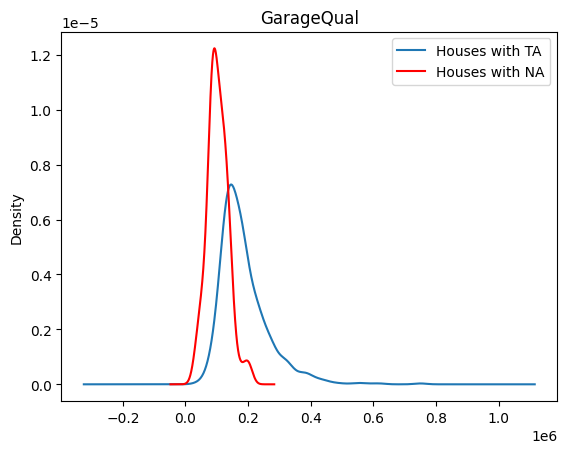

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

storing the blue curve

In [13]:
temp = df[df['GarageQual']=='TA']['SalePrice']

filling the missing values with 'TA'

In [15]:
df['GarageQual'].fillna('TA',inplace=True)

now comparing both the graphs of the TA column,one with missing values and the other 
filled missing values  filled with TA

Text(0.5, 1.0, 'GarageQual')

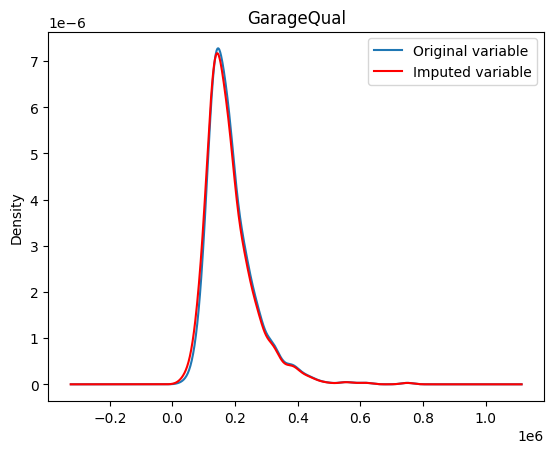

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

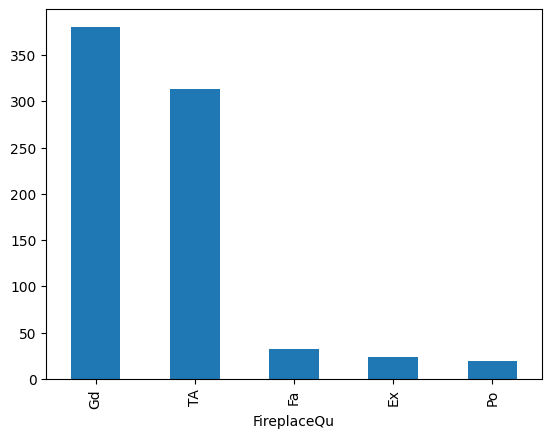

In [19]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Now we will repeat the same steps with the 'FireplaceQu' column 

In [20]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

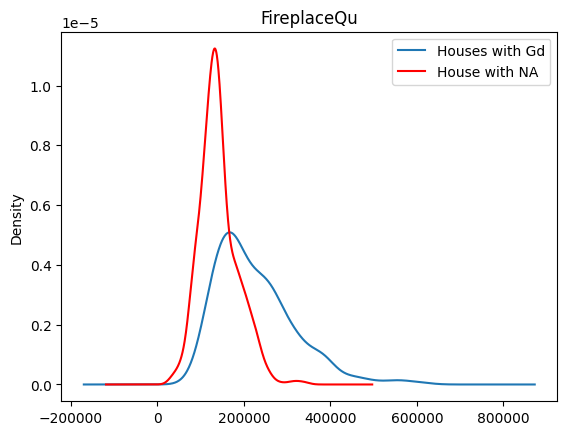

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'House with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [23]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [25]:
df['FireplaceQu'].fillna('Gd', inplace=True)

Text(0.5, 1.0, 'Fireplace after imputation')

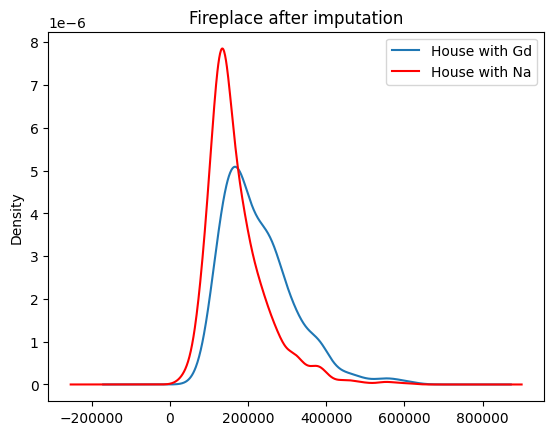

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax = ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['House with Gd','House with Na']
ax.legend(lines, labels, loc='best')
plt.title('Fireplace after imputation')

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(strategy='most_frequent')

In [35]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [36]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)